<a href="https://colab.research.google.com/github/DanielP53/Labs-SP1/blob/master/laboratorio%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)



#Dataset

In [16]:
!unzip -o '/images.zip'

Archive:  /images.zip
  inflating: images/Images/train/african/n02116738_1097.jpg  
  inflating: images/Images/train/african/n02116738_1105.jpg  
  inflating: images/Images/train/african/n02116738_1180.jpg  
  inflating: images/Images/train/african/n02116738_124.jpg  
  inflating: images/Images/train/african/n02116738_1398.jpg  
  inflating: images/Images/train/african/n02116738_1591.jpg  
  inflating: images/Images/train/african/n02116738_1627.jpg  
  inflating: images/Images/train/african/n02116738_1739.jpg  
  inflating: images/Images/train/african/n02116738_1815.jpg  
  inflating: images/Images/train/african/n02116738_1849.jpg  
  inflating: images/Images/train/african/n02116738_1927.jpg  
  inflating: images/Images/train/african/n02116738_1948.jpg  
  inflating: images/Images/train/african/n02116738_2005.jpg  
  inflating: images/Images/train/african/n02116738_2020.jpg  
  inflating: images/Images/train/african/n02116738_204.jpg  
  inflating: images/Images/train/african/n02116738

In [0]:
train_dir = os.path.join( 'images/Images/','train')
validation_dir = os.path.join('images/Images/', 'validation')

train_dhole_dir = os.path.join(train_dir, 'dhole')  
train_african_dir = os.path.join(train_dir, 'african')  
validation_dhole_dir = os.path.join(validation_dir, 'dhole') 
validation_african_dir = os.path.join(validation_dir, 'african')  

In [31]:
num_dhole_tr = len(os.listdir(train_dhole_dir))
num_african_tr = len(os.listdir(train_african_dir))

num_dhole_val = len(os.listdir(validation_dhole_dir))
num_african_val = len(os.listdir(validation_african_dir))

total_train = num_dhole_tr + num_african_tr
total_val = num_dhole_val + num_african_val

print('total training dhole images:', num_dhole_tr)
print('total training african images:', num_african_tr)

print('total validation dhole images:', num_dhole_val)
print('total validation african images:', num_african_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training dhole images: 112
total training african images: 128
total validation dhole images: 38
total validation african images: 41
Total training images: 240
Total validation images: 79


In [0]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (150, 150)
CLASS_NAMES = ['african','dhole']

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [41]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 240 images belonging to 2 classes.


In [42]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 79 images belonging to 2 classes.


In [43]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((128, 150, 150, 3), (128,))

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

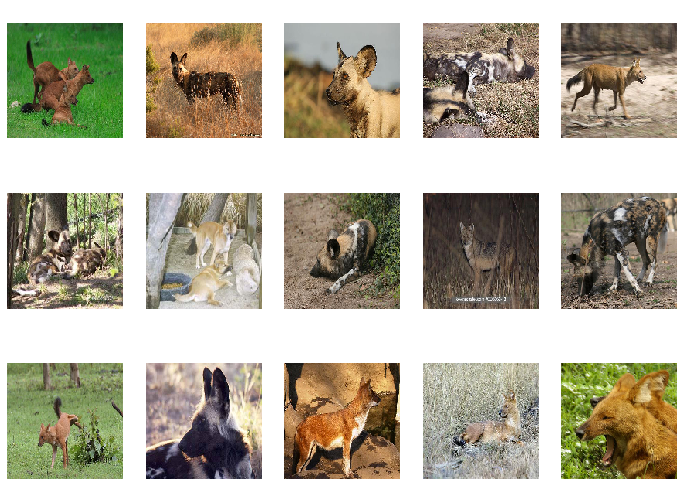

In [45]:
plot_images(training_batch, labels_batch)

#ConvNet

##Convolution

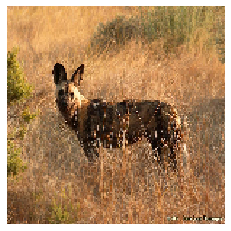

In [46]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

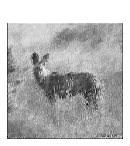

In [48]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

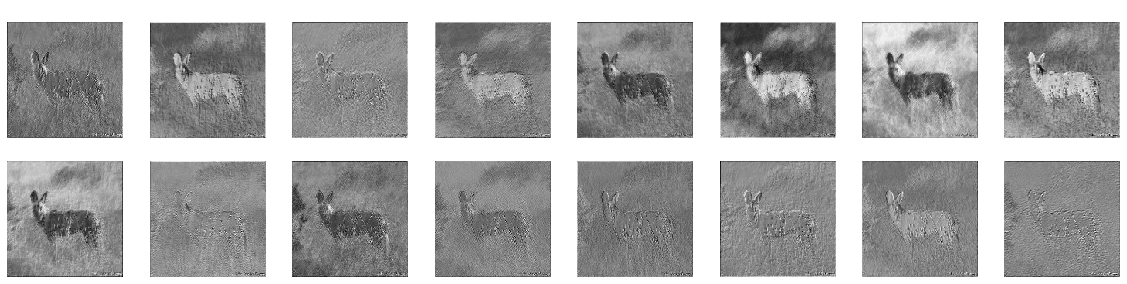

In [49]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [51]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [0]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


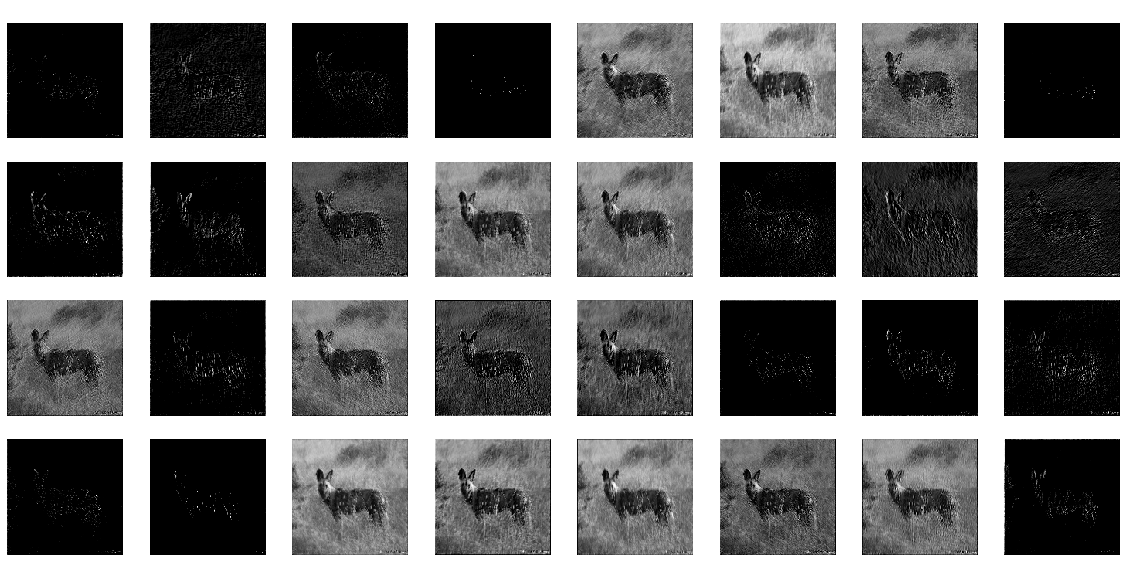

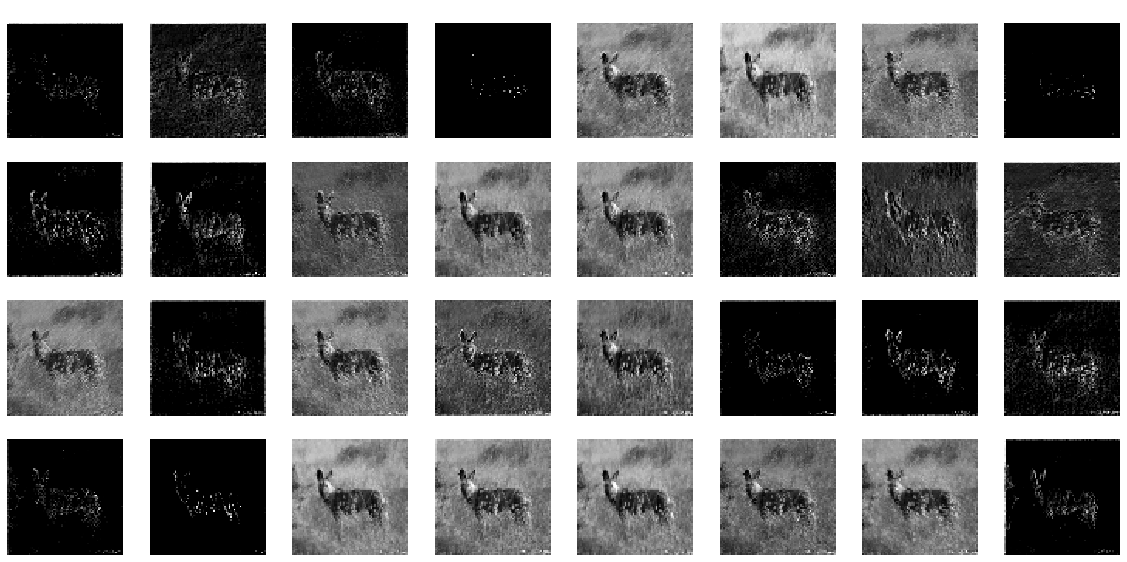

In [53]:
plot_model_filters(model.layers[:2], img)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.5460 - accuracy: 0.8393 - val_loss: 0.6746 - val_accuracy: 0.5316
Epoch 2/15
1/1 [==============================] - 5s 5s/step - loss: 0.6149 - accuracy: 0.5312 - val_loss: 0.5479 - val_accuracy: 0.8481
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.5210 - accuracy: 0.8125 - val_loss: 0.5486 - val_accuracy: 0.7468
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 0.5439 - accuracy: 0.8036 - val_loss: 0.4936 - val_accuracy: 0.8608
Epoch 5/15
1/1 [==============================] - 5s 5s/step - loss: 0.4433 - accuracy: 0.8828 - val_loss: 0.5051 - val_accuracy: 0.7215
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 0.4462 - accuracy: 0.8036 - val_loss: 0.4781 - val_accuracy: 0.7468
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.4200 - accuracy: 

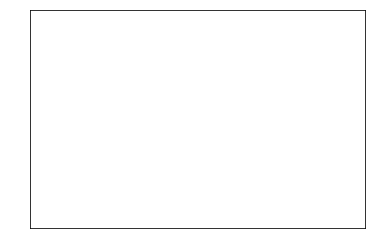

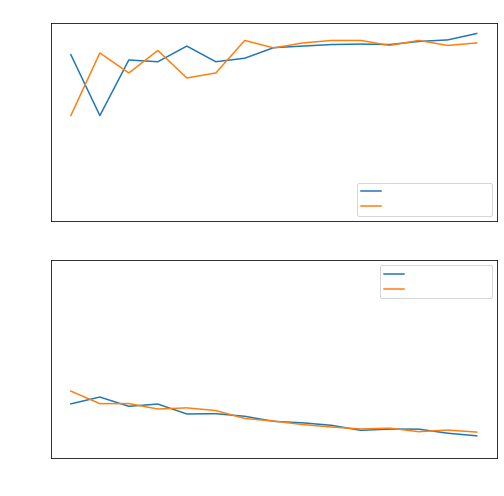

In [57]:
def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
history = train(model)
plot_accuracy_and_loss(history)

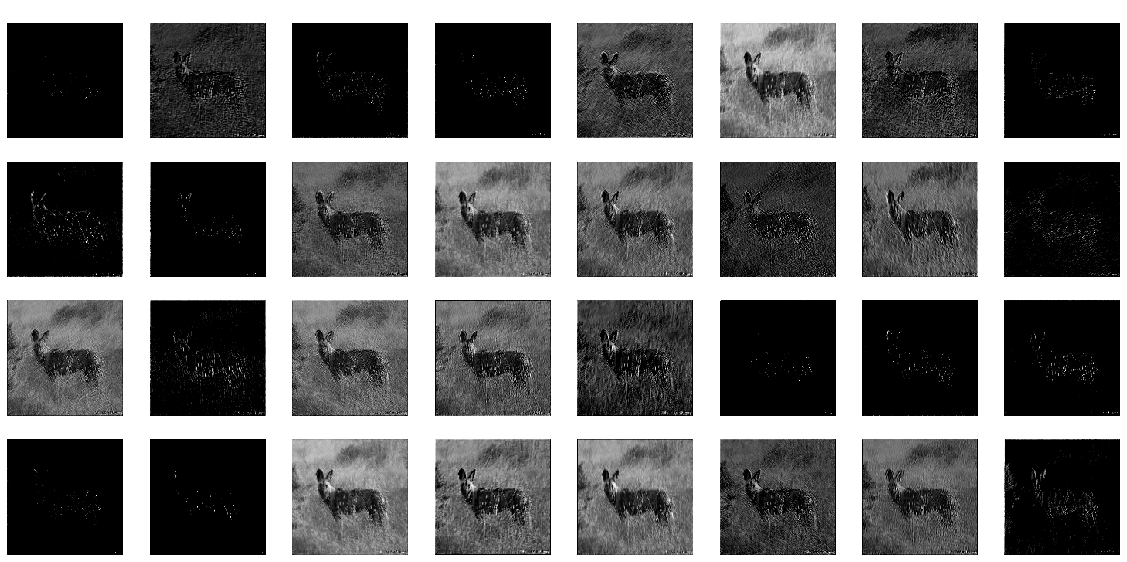

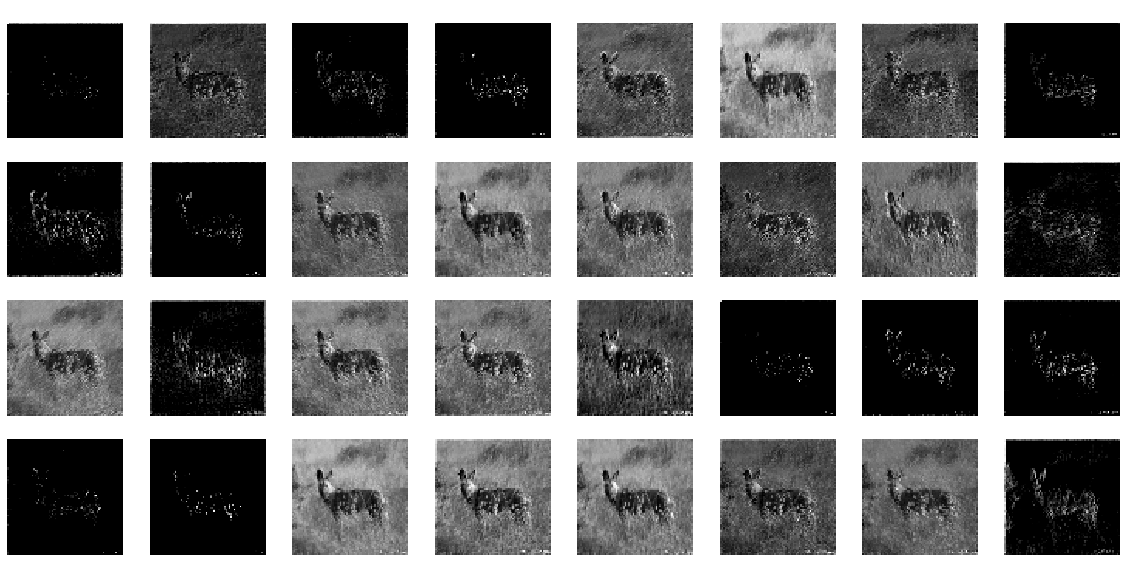

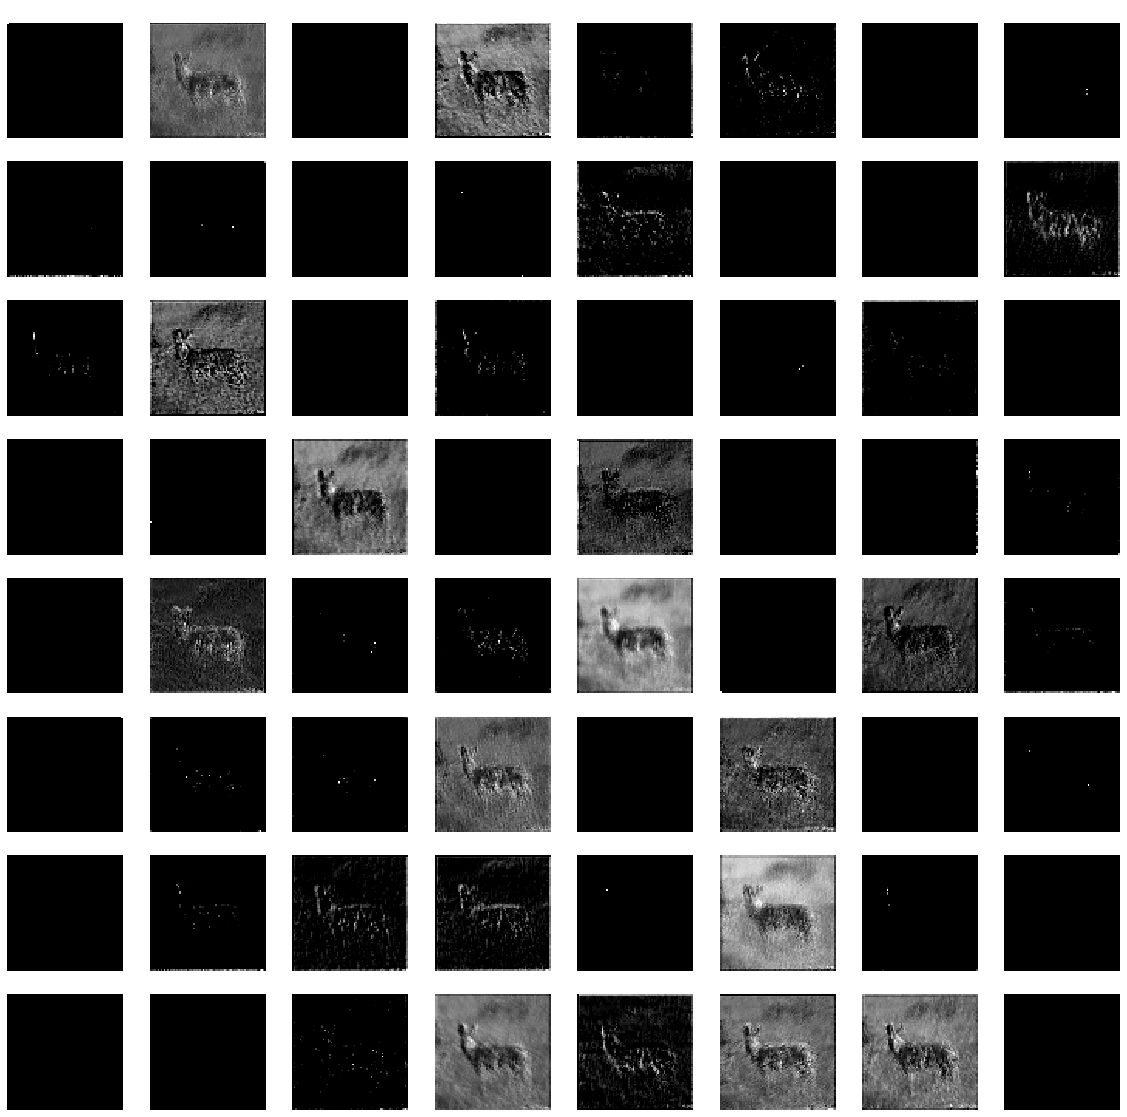

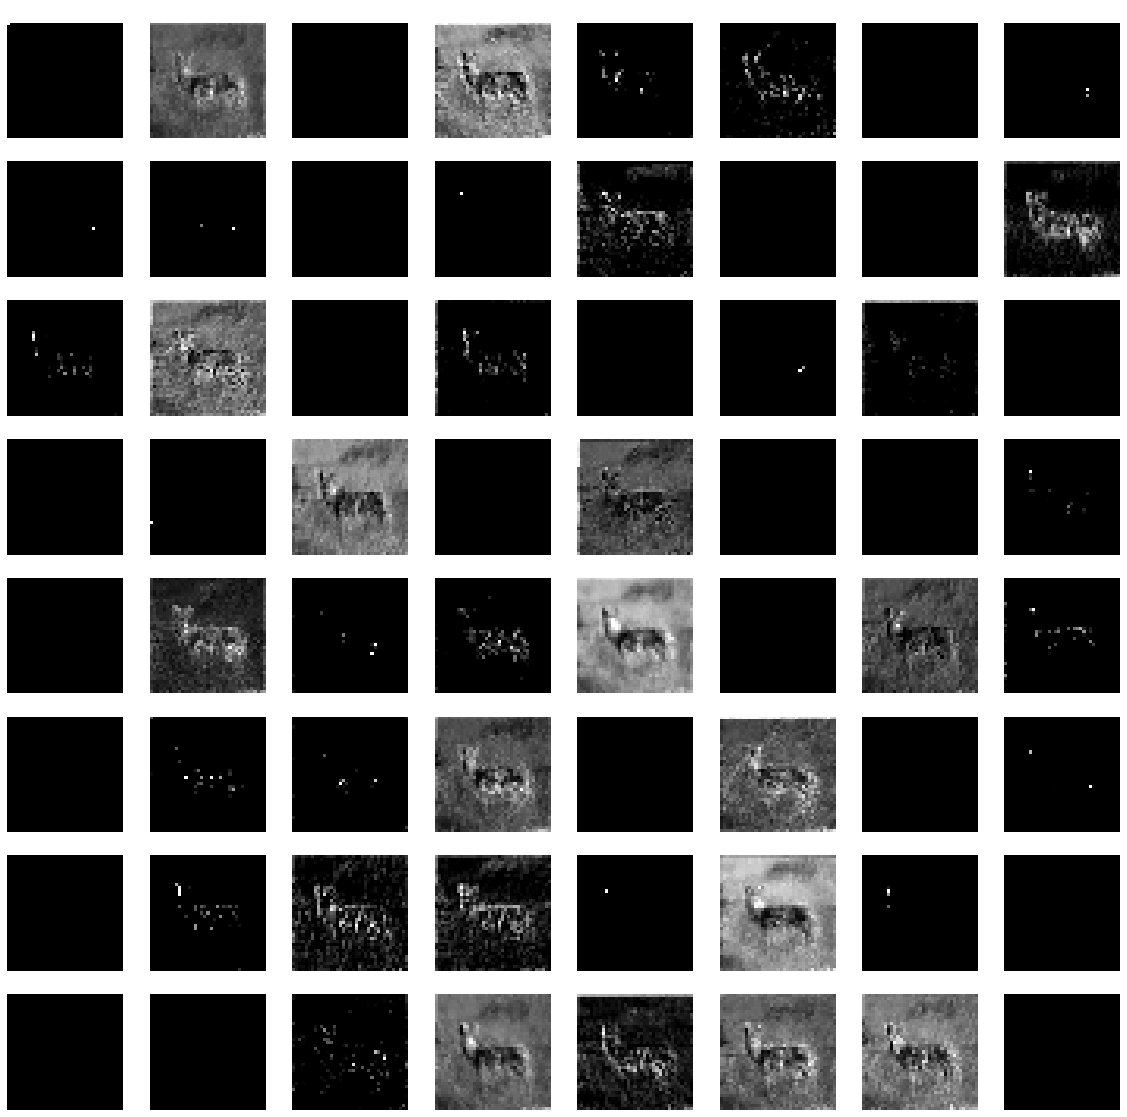

In [56]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [60]:
history = train(model, train_data_gen)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/15
1/1 [==============================] - 5s 5s/step - loss: 0.6843 - accuracy: 0.5804 - val_loss: 3.0875 - val_accuracy: 0.5190
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 2.7393 - accuracy: 0.5714 - val_loss: 0.6847 - val_accuracy: 0.5190
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.6748 - accuracy: 0.5714 - val_loss: 0.8075 - val_accuracy: 0.4810
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 0.8814 - accuracy: 0.4286 - val_loss: 0.7302 - val_accuracy: 0.4810
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 0.7696 - accuracy: 0.4196 - val_loss: 0.6916 - val_accuracy: 0.5949
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 0.6763 - accuracy: 0.6518 - val_loss: 0.7770 - val_accuracy: 0.5190
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.7726 - accuracy: 

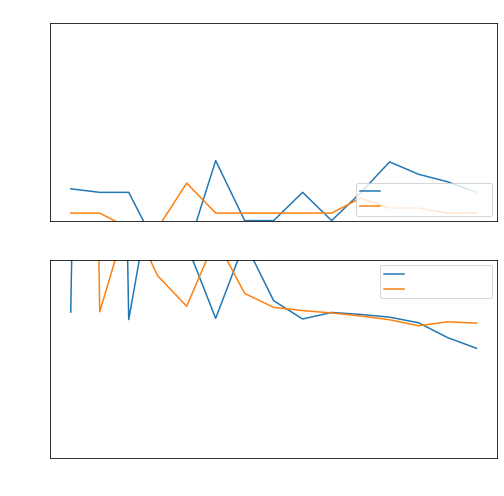

In [61]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

##Data augmentation

Found 240 images belonging to 2 classes.


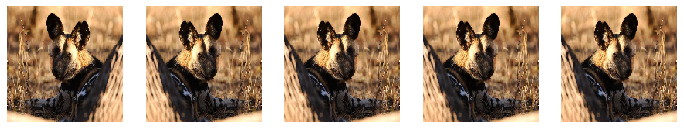

In [62]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 240 images belonging to 2 classes.


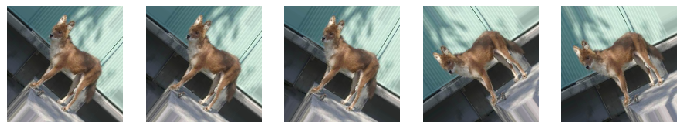

In [63]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 240 images belonging to 2 classes.


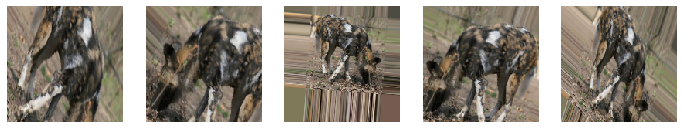

In [64]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

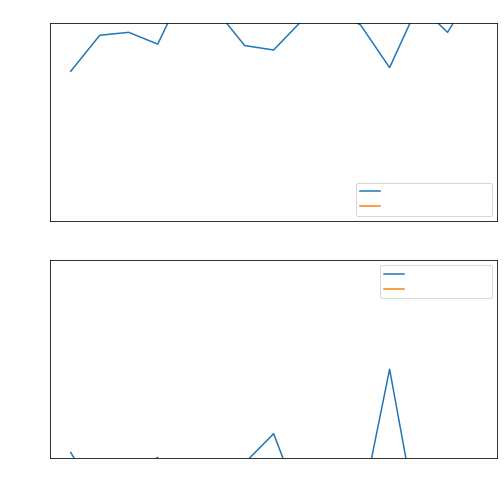

In [66]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])